In [96]:
#importing stuff
import numpy as np
import pandas as pd
import json
import os #used to cycle through your files
import re

#for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [97]:
#reading in cleaned data
pokemon = pd.read_csv('cleanpokemon.csv')
#pokemon = pokemon.set_index('Name')
#pokemon.index.names = [None]

In [98]:
pokemon

,Name,Stamina,Primary,MaxHP,Weight,Height,percentage_male,HP,Generation,Legendary
0,Bulbasaur,128,Grass,113,6.9,0.7,88.1,45,1,False
1,Ivysaur,155,Grass,134,13.0,1.0,88.1,60,1,False
2,Venusaur,190,Grass,162,100.0,2.0,88.1,80,1,False
3,Charmander,118,Fire,105,8.5,0.6,88.1,39,1,False
4,Charmeleon,151,Fire,131,19.0,1.1,88.1,58,1,False
...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205,Ground,173,68.0,1.5,100.0,89,5,True
645,Kyurem,245,Dragon,205,325.0,3.0,NaN,125,5,True
646,Keldeo,209,Water,177,48.5,1.4,NaN,91,5,False
647,Meloetta,225,Normal,189,6.5,0.6,NaN,100,5,False


In [99]:
colours = {
'Normal': '#A8A77A',
'Fire': '#EE8130',
'Water': '#6390F0',
'Electric': '#F7D02C',
'Grass': '#7AC74C',
'Ice': '#96D9D6',
'Fighting': '#C22E28',
'Poison': '#A33EA1',
'Ground': '#E2BF65',
'Flying': '#A98FF3',
'Psychic': '#F95587',
'Bug': '#A6B91A',
'Rock': '#B6A136',
'Ghost': '#735797',
'Dragon': '#6F35FC',
'Dark': '#705746',
'Steel': '#B7B7CE',
'Fairy': '#D685AD',
}

#https://gist.github.com/apaleslimghost/0d25ec801ca4fc43317bcff298af43c3


In [100]:
fig=px.scatter(pokemon, x='percentage_male', y='HP', color='Primary',
          color_discrete_map=colours, hover_name="Name")

fig.show()
#plt.legend(loc=(1.01,0))
fig.write_html("EDAplots/pmbyHP-scat.html",
              include_plotlyjs='cdn')

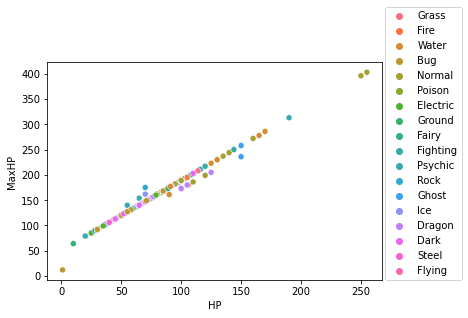

In [101]:
sns.scatterplot(data=pokemon, x='HP', y='MaxHP', hue='Primary')

plt.legend(loc=(1.01,0))

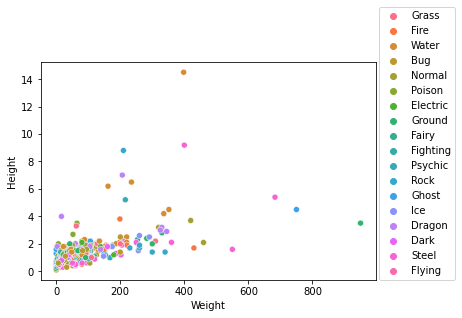

In [102]:
sns.scatterplot(data=pokemon, x='Weight', y='Height', hue='Primary')

plt.legend(loc=(1.01,0))

px.scatter(data_frame=pokemon, x='Weight', y='Height',color='Primary',
          color_discrete_map=colours, size='HP',hover_name="Name")

In [103]:
fig=px.box(pokemon, x="Primary", y="percentage_male",hover_name="Name",
       color="Primary", color_discrete_map=colours)

fig.show()
fig.write_html("EDAplots/pmbyprim-box.html",
               include_plotlyjs='cdn')


In [104]:
pokemon.loc[pokemon["Name"]=="Wobbuffet"]

,Name,Stamina,Primary,MaxHP,Weight,Height,percentage_male,HP,Generation,Legendary
201,Wobbuffet,382,Psychic,313,28.5,1.3,50.0,190,2,False


In [105]:
fig=px.box(pokemon, x="Primary", y="HP",hover_name="Name",
       color="Primary", color_discrete_map=colours)

fig.show()
fig.write_html("EDAplots/HPbyPrim-box.html",
                include_plotlyjs='cdn')

In [106]:
fig=px.box(pokemon, x="Generation", y="Height", hover_name="Name",
       color="Generation")

fig.show()
fig.write_html("EDAplots/HeightbyGen-box.html",include_plotlyjs='cdn')

In [107]:
fig=px.box(pokemon, x="Generation", y="Weight", hover_name="Name", color="Generation")

fig.show()
fig.write_html("EDAplots/WeightbyGen-box.html",
               include_plotlyjs='cdn')

In [108]:
fig = px.scatter(pokemon, x="Weight",y="Height", size='HP',
                 color='Primary',color_discrete_map=colours,
                hover_name="Name")

fig.show()
fig.write_html("EDAplots/HeightbyWeight,prim-scat.html",
              include_plotlyjs='cdn')

## Gen1

In [109]:
gen1_df = pokemon.loc[pokemon['Generation']==1]

gen1_df

fig = px.scatter(gen1_df, x="Weight",
                y="Height", size='HP',color='Primary',
                color_discrete_map=colours, hover_name="Name")
fig.show()


fig.write_html("EDAplots/HeightbyWeightgen1-scat.html",
               include_plotlyjs='cdn')

## Gen1

In [110]:
fig=px.box(gen1_df, x="Primary", y="HP",
       color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/HPbyPrimgen1-box.html",
               include_plotlyjs='cdn')

## Gen2

In [111]:
## Gen1gen2_df = pokemon.loc[pokemon['Generation']==2]

gen2_df

fig = px.scatter(gen2_df, x="Weight",
                y="Height", size='HP',color='Primary',
                color_discrete_map=colours, hover_name="Name")

fig.show()
fig.write_html("EDAplots/HeightbyWeightgen2-scat.html",
                include_plotlyjs='cdn')

In [112]:
fig=px.box(gen2_df, x="Primary", y="HP",
       color="Primary", color_discrete_map=colours, hover_name='Name')

#gen2_df.loc[gen2_df['Primary']=='Poison']
fig.show()
fig.write_html("EDAplots/HPbyPrimgen2-box.html",
                include_plotlyjs='cdn')

## Gen3

In [113]:
gen3_df = pokemon.loc[pokemon['Generation']==3]

gen3_df

fig = px.scatter(gen3_df, x="Weight",
                y="Height", size='HP',color='Primary',
                color_discrete_map=colours, hover_name="Name")

fig.show()
fig.write_html("EDAplots/HeightbyWeightgen3-scat.html",
              include_plotlyjs='cdn')

In [114]:
fig=px.box(gen3_df, x="Primary", y="HP",
       color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/HPbyPrimgen3-box.html",
                include_plotlyjs='cdn')




In [115]:
#trying to get the discrete colors nice
#color_diescrete_map = {'Normal':'rgb(168,167,122)', 'Fire':rgb(238, 130, 48),
                       #'Fighting':rgb(255,3,3)}

## Gen4

In [116]:
gen4_df = pokemon.loc[pokemon['Generation']==4]
## Gen3## Gen3
gen4_df

fig = px.scatter(gen4_df, x="Weight",y="Height", size='HP',
                 color='Primary', color_discrete_map=colours, hover_name="Name")

fig.show()
fig.write_html("EDAplots/HeightbyWeightgen4-scat.html",
                include_plotlyjs='cdn')

In [117]:
fig=px.box(gen4_df, x="Primary", y="HP",
       color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/HPbyPrimgen4-box.html",
                include_plotlyjs='cdn')

## Gen5

In [119]:
gen5_df = pokemon.loc[pokemon['Generation']==5]

gen5_df

f## Gen4ig = px.scatter(gen5_df, x="Weight",y="Height", size='HP',
                 color='Primary', color_discrete_map=colours, hover_name="Name")

fig.show()
fig.write_html("EDAplots/HeightbyWeightgen5-scat.html",
                include_plotlyjs='cdn')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [147]:
fig=px.box(gen5_df, x="Primary", y="HP",
       color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/HPbyPrimgen5-box.html",
                include_plotlyjs='cdn')

## Legendary

In [121]:
## Gen4legend_df = pokemon.loc[pokemon['Legendary']==True]

legend_df

fig = px.scatter(legend_df, x="Weight",y="Height", size='HP',
                 color='Primary', color_discrete_map=colours, hover_name="Name")

fig.show()
fig.write_html("EDAplots/HeightbyWeightleg-scat.html",
               include_plotlyjs='cdn')       

In [122]:
fig=px.box(legend_df, x="Primary", y="HP",
       color="Primary", color_discrete_map=colours, hover_name='Name')

#legend_df.loc[legend_df["Primary"]=="Water"]
fig.show()
fig.write_html("EDAplots/HPbyPrimleg-box.html",
               include_plotlyjs='cdn')

In [123]:
legend_df

,Name,Stamina,Primary,MaxHP,Weight,Height,percentage_male,HP,Generation,Legendary
143,Articuno,207,Ice,175,55.4,1.70,NaN,90,1,True
144,Zapdos,207,Electric,175,52.6,1.60,NaN,90,1,True
145,Moltres,207,Fire,175,60.0,2.00,NaN,90,1,True
149,Mewtwo,214,Psychic,180,122.0,2.00,NaN,106,1,True
242,Raikou,207,Electric,175,178.0,1.91,NaN,90,2,True
243,Entei,251,Fire,210,198.0,2.11,NaN,115,2,True
244,Suicune,225,Water,189,187.0,2.01,NaN,100,2,True
248,Lugia,235,Psychic,197,216.0,5.21,NaN,106,2,True
249,Ho-Oh,214,Fire,180,199.0,3.81,NaN,106,2,True
376,Regirock,190,Rock,162,230.0,1.70,NaN,80,3,True


In [124]:
#px.histogram(pokemon, x="Generation", y="Legendary")

In [125]:
#pokemon["Generation"] = pokemon["Generation"].astype("category")

In [126]:
#not my favorite

fig=px.bar(pokemon, x="Generation", y="Legendary",
           color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/legbygen-bar.html",
                include_plotlyjs='cdn')

In [127]:
fig=px.bar(pokemon, x="Primary", y="Legendary",
           color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/legbyprim-bar.html",
               include_plotlyjs='cdn')

In [128]:
#not my favorite
fig=px.bar(pokemon, x="Generation", y="Primary",
           color="Primary", color_discrete_map=colours, hover_name='Name')

fig.show()
fig.write_html("EDAplots/primbygen-bar.html",
               include_plotlyjs='cdn')

In [129]:
fig=px.bar(pokemon, x="Primary", color="Primary", color_discrete_map=colours,
           hover_name='Name', hover_data=["Generation"])

fig.show()
fig.write_html("EDAplots/prim-bar.html",
                include_plotlyjs='cdn')

In [130]:
#not my favorite
fig=px.bar(pokemon, x="Primary", color="Generation", color_discrete_map=colours,
           hover_name='Name', hover_data=["Generation"])

fig.show()
fig.write_html("EDAplots/primbygen-bar.html",
               include_plotlyjs='cdn')

In [ ]:
pokemon["Percent_Male"] = pokemon["percentage_male"].astype("category")
#type(pokemon['percentage_male'])
pokemon

In [145]:

fig=px.bar(pokemon, x="Percent_Male", color="Generation",
           hover_name='Name', hover_data=["Generation"])

fig.show()
fig.write_html("EDAplots/pmbygen-bar.html",
               include_plotlyjs='cdn')

In [144]:

fig=px.bar(pokemon, x="Percent_Male", color="Primary", color_discrete_map=colours, 
           hover_name='Name', hover_data=["Generation"])

fig.show()
fig.write_html("EDAplots/pmbyprim-bar.html",
               include_plotlyjs='cdn')

,Name,Stamina,Primary,MaxHP,Weight,Height,percentage_male,HP,Generation,Legendary,Percent_Male
0,Bulbasaur,128,Grass,113,6.9,0.7,88.1,45,1,False,88.1
1,Ivysaur,155,Grass,134,13.0,1.0,88.1,60,1,False,88.1
2,Venusaur,190,Grass,162,100.0,2.0,88.1,80,1,False,88.1
3,Charmander,118,Fire,105,8.5,0.6,88.1,39,1,False,88.1
4,Charmeleon,151,Fire,131,19.0,1.1,88.1,58,1,False,88.1
...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205,Ground,173,68.0,1.5,100.0,89,5,True,100.0
645,Kyurem,245,Dragon,205,325.0,3.0,NaN,125,5,True,NaN
646,Keldeo,209,Water,177,48.5,1.4,NaN,91,5,False,NaN
647,Meloetta,225,Normal,189,6.5,0.6,NaN,100,5,False,NaN


In [146]:
pokemon

,Name,Stamina,Primary,MaxHP,Weight,Height,percentage_male,HP,Generation,Legendary,Percent_Male
0,Bulbasaur,128,Grass,113,6.9,0.7,88.1,45,1,False,88.1
1,Ivysaur,155,Grass,134,13.0,1.0,88.1,60,1,False,88.1
2,Venusaur,190,Grass,162,100.0,2.0,88.1,80,1,False,88.1
3,Charmander,118,Fire,105,8.5,0.6,88.1,39,1,False,88.1
4,Charmeleon,151,Fire,131,19.0,1.1,88.1,58,1,False,88.1
...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205,Ground,173,68.0,1.5,100.0,89,5,True,100.0
645,Kyurem,245,Dragon,205,325.0,3.0,NaN,125,5,True,NaN
646,Keldeo,209,Water,177,48.5,1.4,NaN,91,5,False,NaN
647,Meloetta,225,Normal,189,6.5,0.6,NaN,100,5,False,NaN
